In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

# Load the pre-trained model

Load the VGG19 pre-trained model from the `keras.applications` library, which is a very deep network trained on more than a million images from the ImageNet database. THe network is trained to classify images into 1000 object categories.

In [4]:
# Load the VGG19 model

from tensorflow.keras.applications import VGG19

vgg_model = VGG19()

574717952/574710816 [==============================] - 13s 0us/step


In [5]:
# Get the unputs, layers and display the summary

vgg_input = vgg_model.input
vgg_layers = vgg_model.layers
vgg_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### Build a model to access the layer outputs

In [6]:
from tensorflow.keras.models import Model

In [7]:
# Build a model that returns the layer outputs

layer_outputs = [layer.output for layer in vgg_layers]
features = Model(inputs=vgg_input, outputs=layer_outputs)

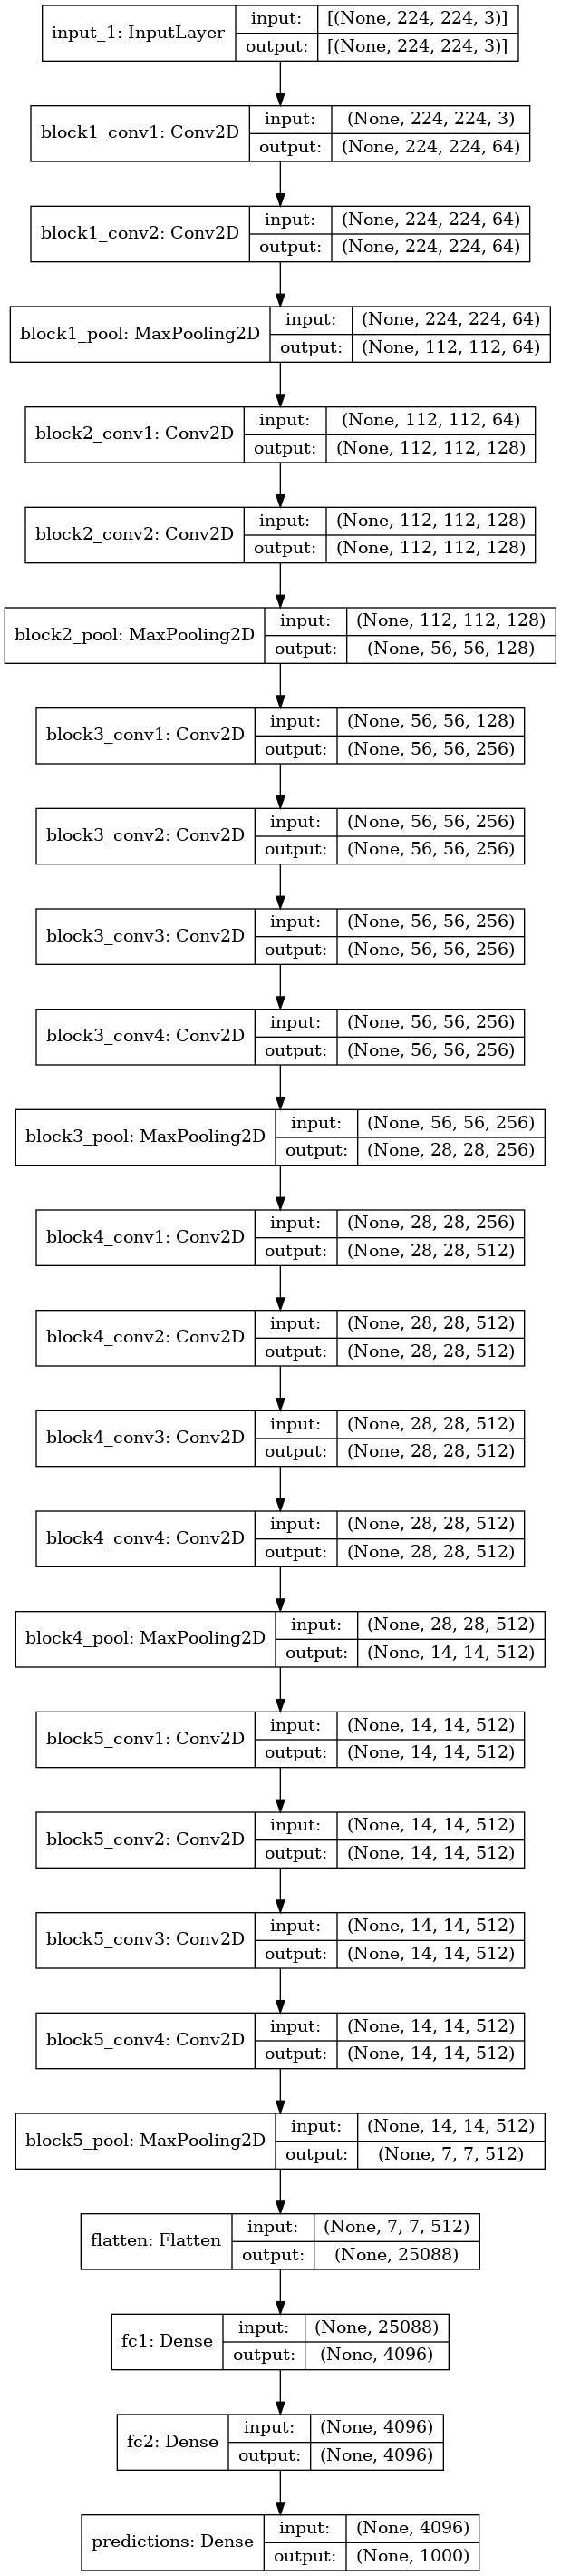

In [10]:
# Plot the model

tf.keras.utils.plot_model(features, 'vgg19_model.png', show_shapes=True)

In [13]:
# Test the model on a random input

img = np.random.random((1, 224, 224, 3)).astype('float32')
extracted_features=features(img)

### Load the 'cool cat' picture

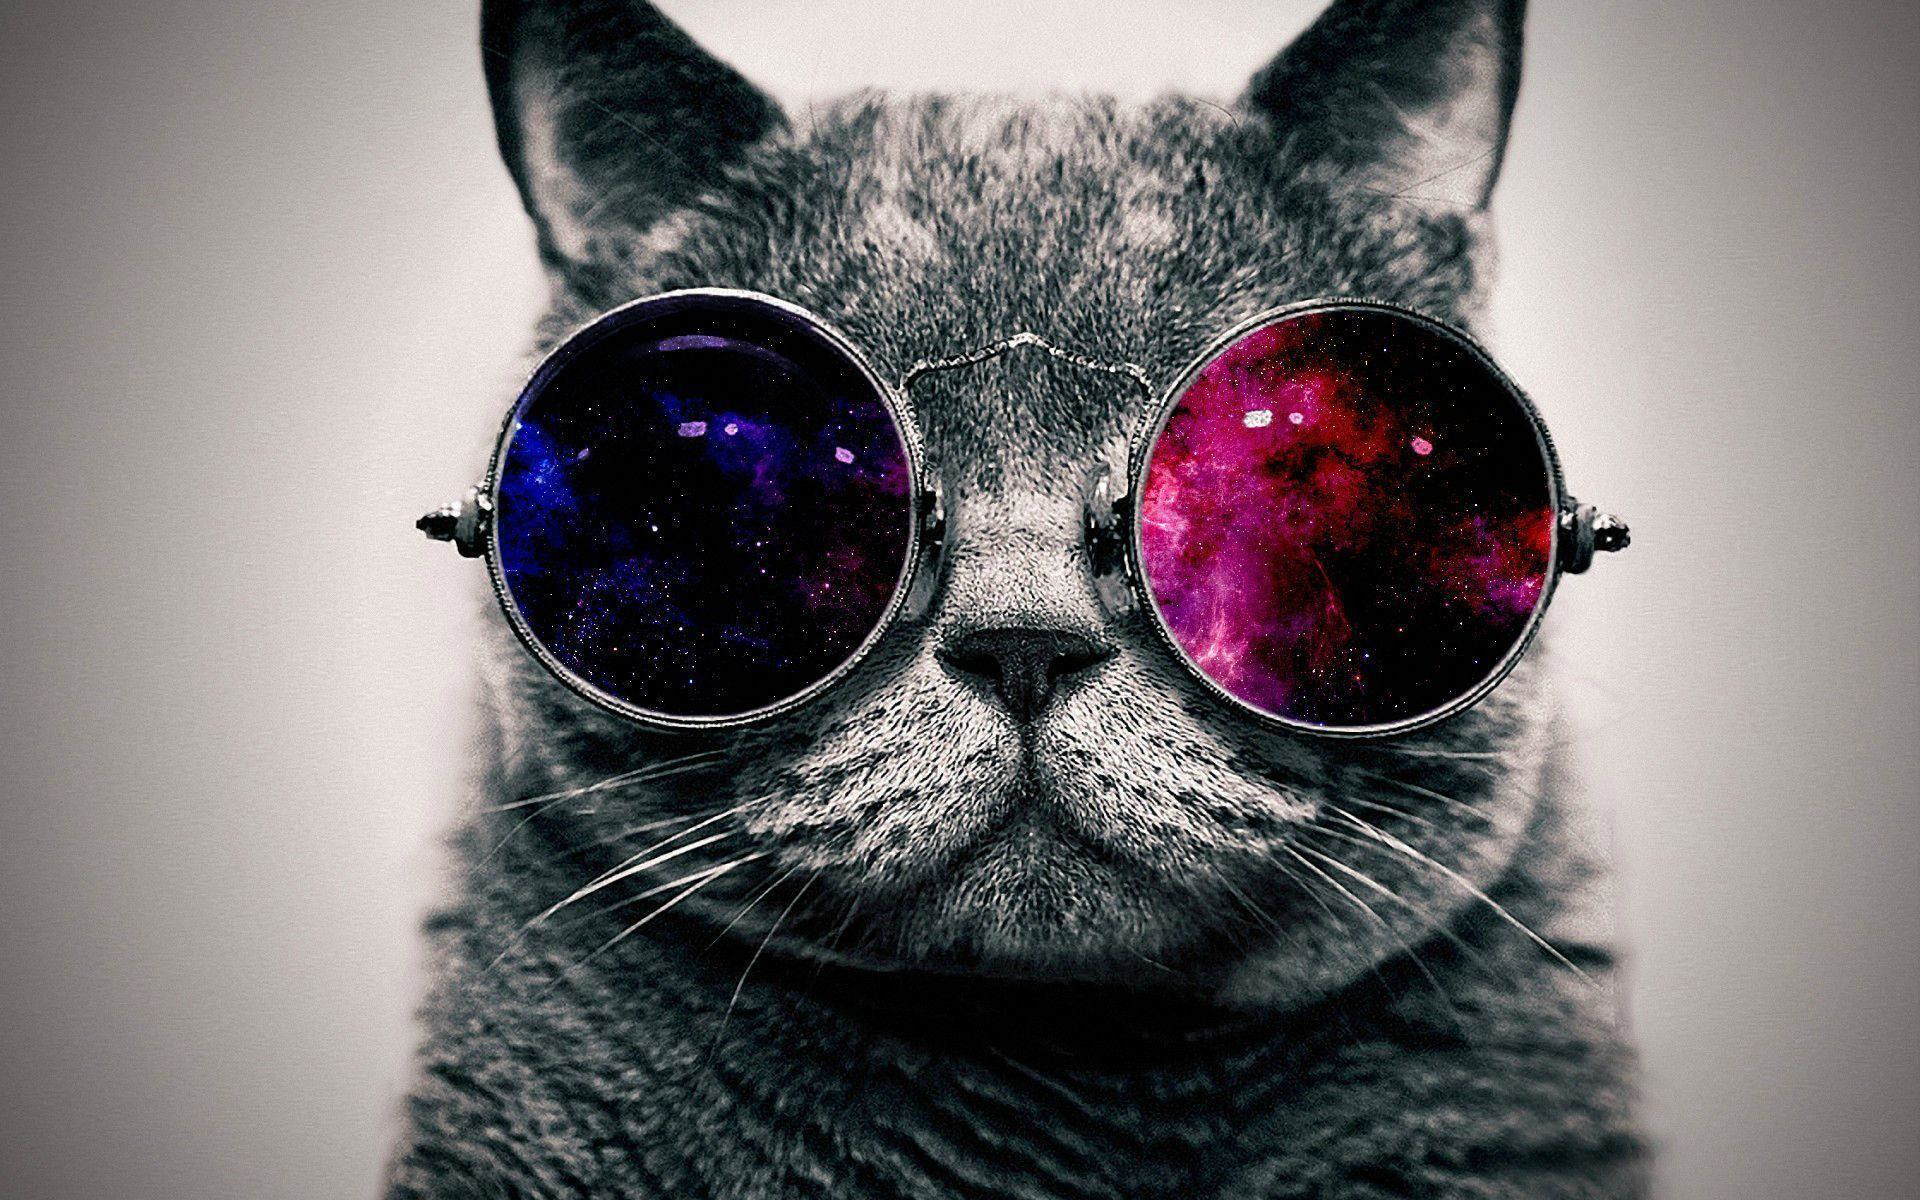

In [21]:
import IPython.display as display
from PIL import Image

display.display(Image.open('cool_cat.jpg'))

### Visualize network features from the input image

In [22]:
# Preprocess the image

from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image

img_path='cool_cat.jpg'
img = image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [24]:
# Extract the features

extracted_features = features(x)


 f1.shape:  (1, 224, 224, 3)


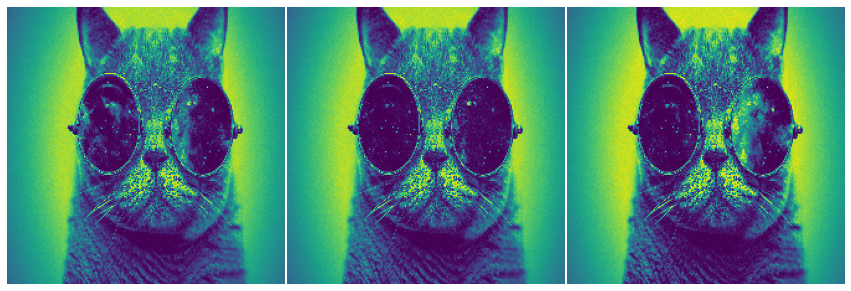

In [28]:
# Visualize the input channels

f1 = extracted_features[0]
print('\n f1.shape: ', f1.shape)

imgs = f1[0,:,:]
plt.figure(figsize=(15, 15))

for n in range(3):
    ax = plt.subplot(1, 3, n+1)
    plt.imshow(imgs[:,:,n])
    plt.axis('off')
plt.subplots_adjust(wspace=0.01, hspace=0.01)


 f2.shape:  (1, 224, 224, 64)


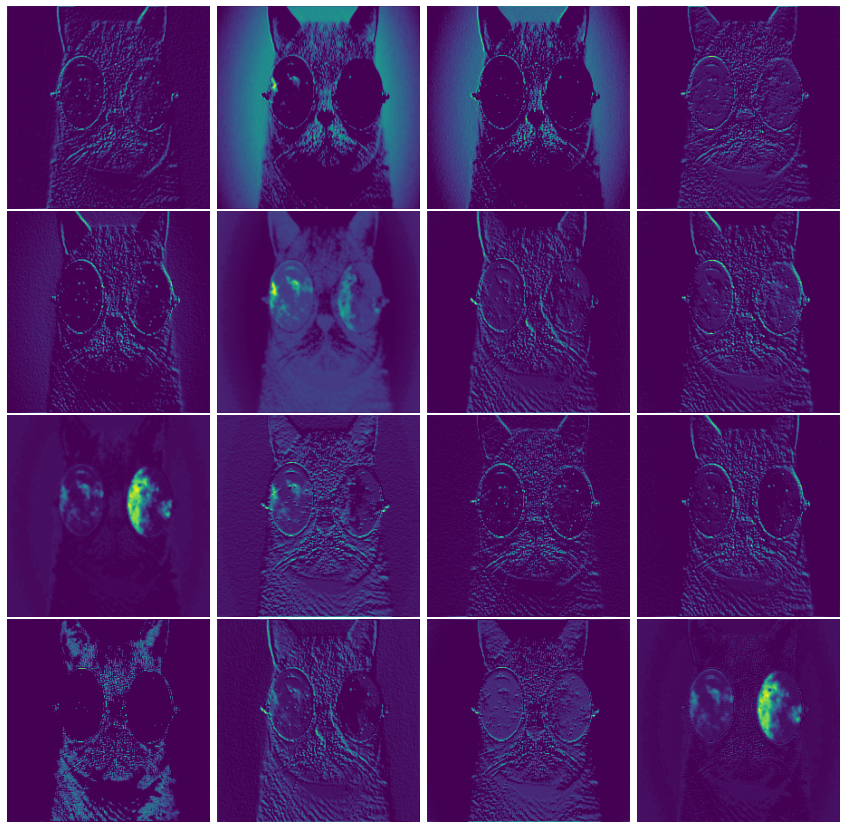

In [29]:
# Visualize some features in the first hidden layer

f1 = extracted_features[1]
print('\n f2.shape: ', f1.shape)

imgs = f1[0,:,:]
plt.figure(figsize=(15, 15))

for n in range(16):
    ax = plt.subplot(4, 4, n+1)
    plt.imshow(imgs[:,:,n])
    plt.axis('off')
plt.subplots_adjust(wspace=0.01, hspace=0.01)

In [30]:
# Build a model to extract features by layer name

extracted_features_block1_pool = Model(inputs = features.input, outputs=features.get_layer('block1_pool').output)
block1_pool_features = extracted_features_block1_pool.predict(x)

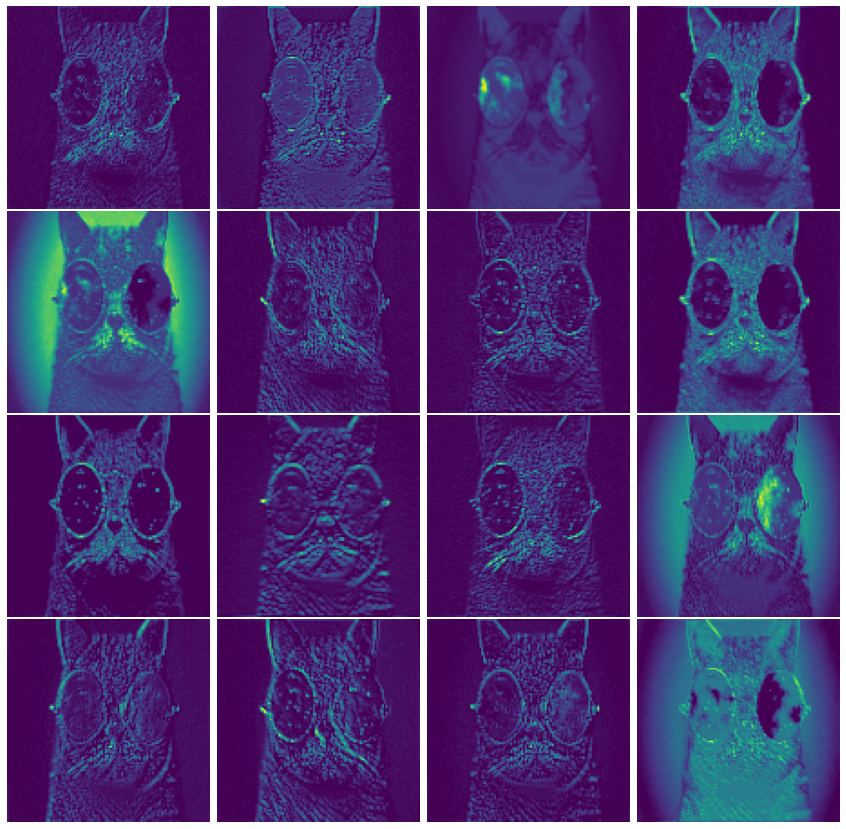

In [36]:
imgs = block1_pool_features[0,:,:]
plt.figure(figsize=(15, 15))

for n in range(16):
    ax = plt.subplot(4, 4, n+1)
    plt.imshow(imgs[:,:,n])
    plt.axis('off')
plt.subplots_adjust(wspace=0.01, hspace=0.01)

In [37]:
# Build a model to extract features by layer name

extracted_features_block5_conv4 = Model(inputs = features.input, outputs=features.get_layer('block4_conv4').output)
block5_conv4_features = extracted_features_block5_conv4.predict(x)

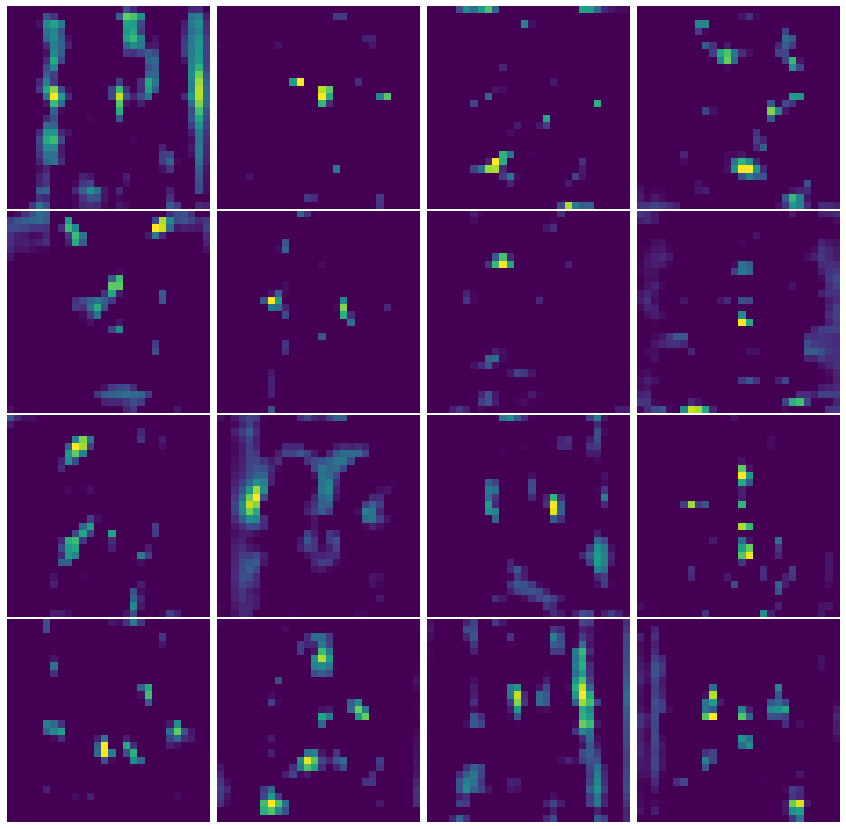

In [38]:
imgs = block5_conv4_features[0,:,:]
plt.figure(figsize=(15, 15))

for n in range(16):
    ax = plt.subplot(4, 4, n+1)
    plt.imshow(imgs[:,:,n])
    plt.axis('off')
plt.subplots_adjust(wspace=0.01, hspace=0.01)